# Lab 5

## Quasilinearization Technique

The non-linear ODE/PDE is linearized iteratively. 

Non-linear BVP is 
$$F(y'', y', y, x) = 0 \\
y(a)\; = \;y_a \;,\; y(b) \;=\; y_b \qquad a < x < b$$

Treat F as a function of y'',y' and y at any x. At every iteration F is reduced to a linear form. At (k+1)th iteration expand F about the known form of y'', y', y evaluated at the kth iteraton i.e. $y''^{(k)}$, $y'^{(k)}$, $y^{(k)}$. 

Expand  $F(y'', y', y, x) = 0$ about $y''^{(k)}$, $y'^{(k)}$, $y^{(k)}$ by the taylor series expansion.



### Question 5a
$$y'' + (y')^2 - y^2 + y + 1 = 0 \\
y(0) = \frac{1}{2} \; , \; y(\pi)\;=\;-\frac{1}{2}$$

In [1]:
import numpy as np
import pandas as pd

In [83]:
x1 = 0
x2 = np.pi
y1 = 0.5
y2 = -0.5
ep = 0.0001

In [84]:
def thomas_(a,b,c,d):
    c_ = np.zeros(c.size)
    d_ = np.zeros(d.size)

    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, c.shape[0]-1):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])

    for i in range(1, d.shape[0]):
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    return [c_, d_]

def mod(a):
    if a>0:
        return a
    return -1*a

def main_(n=3):
    h = np.pi/n
    
    y = np.zeros(n+1)
    x_f = np.zeros(n+1)
    
    
    
    for i in range(n+1):
        x_f[i] = (i)*h
        y[i] = 0.5 - np.sin(i*h/2)
    
    
    flag = 0
    while flag!=1:
        a = np.zeros(n-1)
        b = np.zeros(n-1)
        c = np.zeros(n-1)
        d = np.zeros(n-1)
        res = np.zeros(n-1)
        
        
        for i in range(n-1):
            a[i] = ( 1/(h*h) + (1/(2*h*h))*(y[i+2]-y[i]) )

        for i in range(n-1):
            b[i] = ( -2/(h*h) - 2*y[i+1] + 1 )

        for i in range(n-1):
            c[i] = ( 1/(h*h) - (1/(2*h*h))*(y[i+2]-y[i]) )
            
        for i in range(n-1):
            d[i] = ( -1*((y[i+2]-y[i])/(2*h)) * ((y[i+2]-y[i])/(2*h)) - y[i+1]*y[i+1] - 1 )
            
        d[0] = d[0] - 0.5 * a[0]
        d[-1] = d[-1] + 0.5*c[-1]

        c_, d_ = thomas_(a,b,c,d)

        res[-1] = d_[-1]
        for i in range(n-2):
            res[n-3-i] = d_[n-3-i] - res[n-2-i]*c_[n-3-i]
        
#         print(res)
#         print(y)
        
        flag=1
        for i in range(n-1):
            if mod(y[i+1]-res[i]) > ep:
                flag=0
        
        for i in range(1,n):
            y[i] = res[i-1]
            
        
    return [y, x_f]

In [85]:
a_1, x_1 = main_(3)
a_2, x_2 = main_(7)
a_3, x_3 = main_(13)
a_4, x_4 = main_(30)

print(np.pi/3, np.pi/7, np.pi/13, np.pi/30)

1.0471975511965976 0.4487989505128276 0.241660973353061 0.10471975511965977


In [86]:
import pandas as pd
print(pd.DataFrame(np.column_stack((x_1, a_1)), columns=["x", "predicted"]))
print()
print(pd.DataFrame(np.column_stack((x_2, a_2)), columns=["x", "predicted"]))
print()
print(pd.DataFrame(np.column_stack((x_3, a_3)), columns=["x", "predicted"]))
print()
print(pd.DataFrame(np.column_stack((x_4, a_4)), columns=["x", "predicted"]))

          x  predicted
0  0.000000   0.500000
1  1.047198  -0.238223
2  2.094395  -1.105326
3  3.141593  -0.500000

          x  predicted
0  0.000000   0.500000
1  0.448799   0.100454
2  0.897598  -0.341629
3  1.346397  -0.723208
4  1.795196  -0.959690
5  2.243995  -0.999674
6  2.692794  -0.834517
7  3.141593  -0.500000

           x  predicted
0   0.000000   0.500000
1   0.241661   0.283144
2   0.483322   0.047274
3   0.724983  -0.192958
4   0.966644  -0.422884
5   1.208305  -0.628620
6   1.449966  -0.797822
7   1.691627  -0.920378
8   1.933288  -0.988979
9   2.174949  -0.999536
10  2.416610  -0.951422
11  2.658271  -0.847503
12  2.899932  -0.693973
13  3.141593  -0.500000

           x  predicted
0   0.000000   0.500000
1   0.104720   0.407202
2   0.209440   0.309832
3   0.314159   0.208974
4   0.418879   0.105750
5   0.523599   0.001304
6   0.628319  -0.103206
7   0.733038  -0.206626
8   0.837758  -0.307812
9   0.942478  -0.405647
10  1.047198  -0.499052
11  1.151917  -0.586998
12 

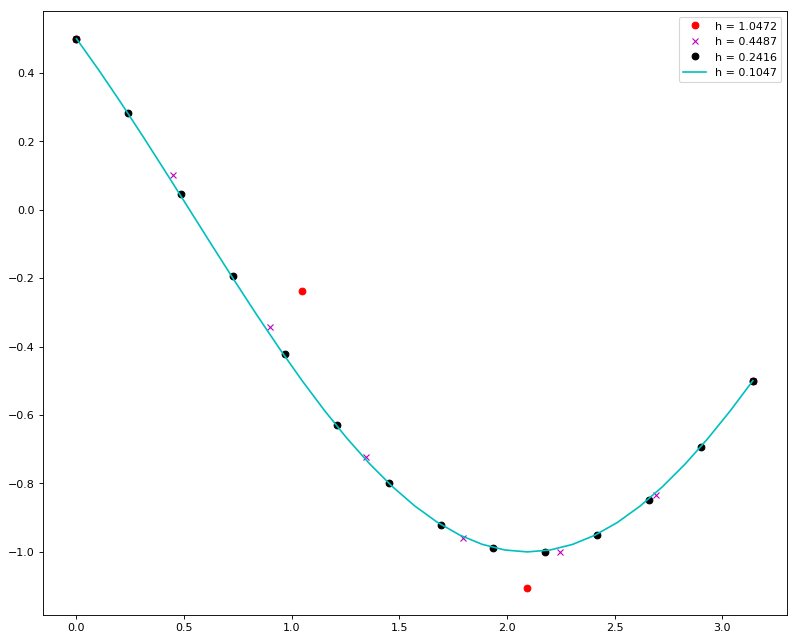

In [87]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_1, a_1, 'ro', label = 'h = 1.0472')
plt.plot(x_2, (a_2),  'mx', label = 'h = 0.4487')
plt.plot(x_3, (a_3),  'ko', label = 'h = 0.2416')
plt.plot(x_4, (a_4), 'c-', label = 'h = 0.1047')
plt.legend(loc='best')
plt.show()

\pagebreak

## Question 5b. Solve by Quasilinearization technique

$$ f''' + ff' + (f')^2 = 0 $$

$$f(0) = 0 \\
f''(0) = 0 \\
f'(10) = 10$$


In [2]:
x1 = 0
x2 = 10
y1_ = 0
y2_ = 0

In [54]:
def thomas_(a,b,c,d):
    c_ = np.zeros(c.shape)
    d_ = np.zeros(d.shape)

    c_[0] = np.dot(np.linalg.inv(b[0]), c[0] )
    d_[0] = np.dot(np.linalg.inv(b[0]), d[0] )

    for i in range(1, c.shape[0]-1):
        c_[i] = np.dot( np.linalg.inv(b[i] - np.dot(a[i], c_[i-1])), c[i] )

    for i in range(1, d.shape[0]):
        d_[i] = np.dot( np.linalg.inv(b[i] - np.dot(a[i], c_[i-1])), d[i] - np.dot(a[i], d_[i-1]) )

    return [c_, d_]

def mod(a):
    if a>0:
        return a
    return -1*a

def main_(n=3):
    ep = 0.0001
    h = (x2-x1)/n

    a = np.zeros((n-1,2,2))
    b = np.zeros((n-1,2,2))
    c = np.zeros((n-1,2,2))
    d = np.zeros((n-1,2))
    x_f = np.zeros((n+1)) 
    
    f = np.zeros(n+1)
    F = np.zeros(n+1)
    for i in range(n+1):
        x_f[i] = x1 + i*h
        f[i] = x_f[i]*x_f[i]*x_f[i]/3 - 100*x_f[i]
        F[i] = x_f[i]*x_f[i]-100
    
    print(x_f)
    print(f)
    print(F)
    
    res_final = np.zeros(n+1)
    res_final = f
    
    flag=140
    while flag!=1:
        
        for i in range(0, n-1):
            a[i][0][0] = -1
            a[i][0][1] = -1*h/2
            a[i][1][0] = 0
            a[i][1][1] = 1/(h*h) - f[i+1]/(2*h)

        for i in range(0, n-1):
            b[i][0][0] = 1
            b[i][0][1] = -1*h/2
            b[i][1][0] = (F[i+2]-F[i])/(2*h)
            b[i][1][1] = -2/(h*h) + 2*F[i+1]

        for i in range(0, n-1):
            c[i][0][0] = 0
            c[i][0][1] = 0
            c[i][1][0] = 0
            c[i][1][1] = 1/(h*h) + f[i+1]/(2*h)

        for i in range(0, n-1):
            d[i][0] = 0
            d[i][1] = F[i+1]*F[i+1] + f[i+1]*(F[i+2]-F[i])/(2*h)

        #d[-1][1] = d[-1][1] - c[-1][-1][-1]
        
        #d[0][1] = d[0][1] + 2*h/3
        b[0][0][1] = b[0][0][1] + (4/3)*(-1*h/2)
        c[0][0][1] = c[0][0][1] + (-1/3)*(-1*h/2)
        b[0][1][1] = b[0][1][1] + (4/3)*(1/(h*h) - f[1]/(2*h))
        c[0][1][1] = c[0][1][1] + (-1/3)*(1/(h*h) - f[1]/(2*h))


        c_,d_ = thomas_(a,b,c,d)

        res = np.zeros((n-1,2))

        res[-1] = d_[-1]
        for i in range(n-2):
            res[n-3-i] = d_[n-3-i] - np.dot(c_[n-3-i], res[n-2-i])
            #print(np.dot(c_[n-3-i],res[n-2-i]))
        print(res[:,0])
        
#         flag=1
#         for i in range(n-1):
#             if mod(f[i+1]-res[i, 0]) > ep or mod(F[i+1]-res[i,1]) > ep:
#                 flag=0

        flag = flag-1

        f[1:-1] = res[:,0]
        F[1:-1] = res[:,1]
        
    return [res_final, x_f]

In [55]:
a_1, x_1 = main_(5)
# a_2, x_2 = main_(6)
# a_3, x_3 = main_(11)
# a_4, x_4 = main_(13)
# a_5, x_5 = main_(17)
# a_6, x_6 = main_(400)

# print(10/3, 10/6, 10/11, 10/13, 10/17, 10/23)

[ 0.  2.  4.  6.  8. 10.]
[   0.         -197.33333333 -378.66666667 -528.         -629.33333333
 -666.66666667]
[-100.  -96.  -84.  -64.  -36.    0.]
[ -98.115176   -188.03552638 -262.03695552 -311.74007522]
[-27.11417512 -53.49485418 -82.81406363 -95.08249996]
[ -5.75459156  24.53852534 -19.69504242  55.48251659]
[ -4.91643993   8.14904629 -16.07281838  20.99095437]
[ -4.59095433  -0.41631544 -15.04481796   2.83127595]
[ -4.58436538  -5.96741189 -17.49641355  -9.70900619]
[-4.49820864 -4.24716314 -7.58970989 -2.95935836]
[-4.50327661 -5.7624105  -8.56357017 -6.47039941]
[ -4.58079909  -7.04233151 -10.47628001  -9.79802435]
[-4.65650936 -7.05659105 -9.93609882 -9.52446192]
[ -4.73705512  -7.21734816 -10.14243935  -9.79719656]
[ -4.81979848  -7.33545903 -10.29880646  -9.95394868]
[ -4.90474455  -7.45630408 -10.45879016 -10.11388166]
[ -4.99197394  -7.58033435 -10.62286272 -10.27788897]
[ -5.08157145  -7.70766629 -10.79117948 -10.44611904]
[ -5.17362604  -7.83842349 -10.96389818 -10.618

In [ ]:
import pandas as pd
print(pd.DataFrame(np.column_stack((x_1, a_1)), columns=["x", "predicted"]))
print()
print(pd.DataFrame(np.column_stack((x_2, a_2)), columns=["x", "predicted"]))
print()
print(pd.DataFrame(np.column_stack((x_3, a_3)), columns=["x", "predicted"]))
print()
print(pd.DataFrame(np.column_stack((x_4, a_4)), columns=["x", "predicted"]))
print()
print(pd.DataFrame(np.column_stack((x_5, a_5)), columns=["x", "predicted"]))
print()
print(pd.DataFrame(np.column_stack((x_6, a_6)), columns=["x", "predicted"]))

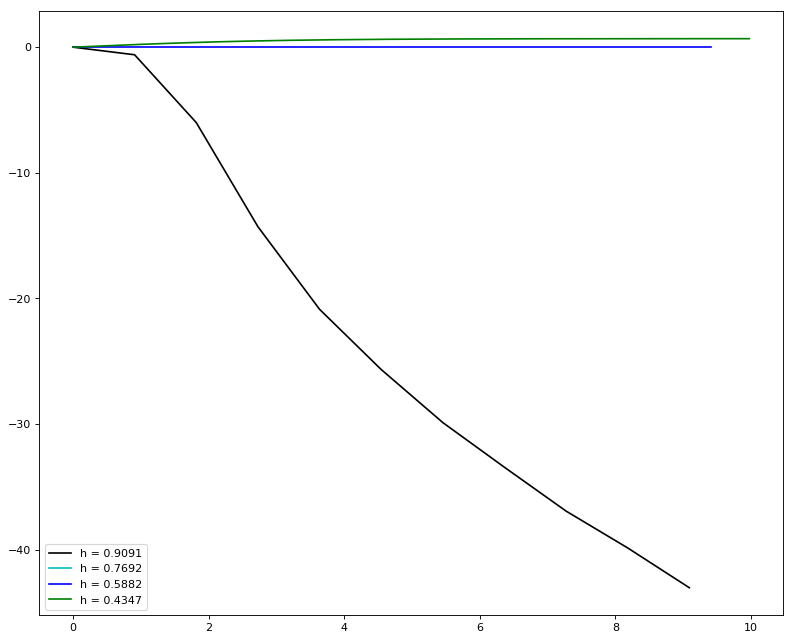

In [38]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# plt.plot(x_1[:-1], a_1[:-1], 'r-', label = 'h = 3.333')
# plt.plot(x_2[:-1], (a_2[:-1]),  'm-', label = 'h = 1.666')
plt.plot(x_3[:-1], (a_3[:-1]),  'k-', label = 'h = 0.9091')
plt.plot(x_4[:-1], (a_4[:-1]), 'c-', label = 'h = 0.7692')
plt.plot(x_5[:-1], (a_5[:-1]), 'b-', label = 'h = 0.5882')
plt.plot(x_6[:-1], (a_6[:-1]), 'g-', label = 'h = 0.4347')
plt.legend(loc='best')
plt.savefig('books_read.png')
plt.show()

In [15]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>